# Project: Wrangling and Analyze Data


## Table of Contents
<ul>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing"> Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#storing">Storing Data</a></li>
<li><a href="#visualization">Analyzing and Visualizing Data</a></li>    
</ul>

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [100]:
#Import all the python libraries that are neccessary for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.patches as mpatches

In [101]:
# Read the CSV file into the dataframe df_twitter
df_twitter=pd.read_csv('twitter-archive-enhanced.csv')
df_twitter.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None



2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [102]:
#Read the TSV file into the dataframe df_image
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name='image_predictions.tsv'
response= requests.get(url)
with open(file_name,'wb')as file:
    file.write(response.content)
df_image=pd.read_csv('image_predictions.tsv',sep ='\t')
df_image.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [103]:
#Read the tweet-json.txt file into the dataframe df_api
df_api = []
with open ('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        
        df_api.append({'tweet_id' : tweet_id,
                         'retweet_count' : retweet_count,
                         'favorite_count':favorite_count})
df_api = pd.DataFrame(df_api)
df_api.head()

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256


## Assessing Data
### Virtual Assessment

In [6]:
#Show the first 5 rows of df_twitter
df_twitter.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Quality Issue

1. Filter to remain with tweets no retweets, then we can drop *in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id & retweeted_status_timestamp*

#### Tidiness Issue
1. Represnt the dog stages in a better way, by combining them into one column

In [7]:
#Show the last 5 rows of df_image
df_image.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


#### Quality Issue
1. The df_image dataframe has less number of rows compared to the df_twitter

#### Tidiness Issue
1. The column headers are not represented in an a clear format i.e *img-num*

In [8]:
#Show the last 5 rows of df_api
df_api.tail()

,favorite_count,retweet_count,tweet_id
2349,111,41,666049248165822465
2350,311,147,666044226329800704
2351,128,47,666033412701032449
2352,132,48,666029285002620928
2353,2535,532,666020888022790149


#### Quality Issue
1. The number of rows in *df_api* are more than rows in *df_image* and less than the rows in *df_twitter*

### Programmatic Assessment

In [9]:
#Find out the number of rows and columns, the datatype and null values in the dataframe df_twitter
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
# Finding out the number of unique values
df_twitter.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [11]:
# Finding out the useful descriptive statistics for each column: mean, std, min, max
df_twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
# Findng out the number of duplicated rows in df_twitter
sum(df_twitter.duplicated())

0

In [13]:
# Checking out the value entry of the dog names
df_twitter.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Penny         10
Tucker        10
Lola          10
Winston        9
Bo             9
Sadie          8
the            8
Toby           7
Buddy          7
an             7
Bailey         7
Daisy          7
Koda           6
Leo            6
Scout          6
Rusty          6
Jack           6
Dave           6
Jax            6
Oscar          6
Stanley        6
Bella          6
Milo           6
Alfie          5
            ... 
Scott          1
Suki           1
Gustaf         1
Sky            1
Snoopy         1
Snoop          1
Joey           1
Sunshine       1
Jomathan       1
Jessifer       1
Kellogg        1
Tom            1
Sprout         1
Tobi           1
Dotsy          1
Dobby          1
Crouton        1
Maisey         1
Staniel        1
Dwight         1
Hero           1
Craig          1
Ozzie          1
Charleson      1
Tayzie         1
Lassie         1
Molly          1
Thor          

In [104]:
# Checking the count of entries of the doggo dog-type
df_twitter.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [105]:
# Checking the count of entries of the floofer dog-type
df_twitter.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [106]:
# Checking the count of entries of the puppo dog-type
df_twitter.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [107]:
# Checking the count of entries of the pupper dog-type
df_twitter.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

#### Quality issues

1. Some values in the rating denominator are not equal to 10 with the highest at 170.
2. Correct the datatypes of the following:
    * tweet_id to string datatype
    * timestamp to datatime datatype
    * rating numerator and rating denominator to float data type
3. Some dog names are invalid (those that start with a lower case such as *'a'* ), we will drop them.
4. The ***None*** in the dog stages;doggo,floofer,puppo and pupper, columns be replaces with ***Null***



In [18]:
#Find out the number of rows and columns, the datatype and null values in the dataframe df_twitter
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
# Findng out the number of duplicated rows
sum(df_image.duplicated())

0

In [20]:
# Finding out the useful descriptive statistics for each column: mean, std, min, max
df_image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### Quality Issue
1. Change the  tweet_id datatype to string datatype

In [21]:
#Find out the number of rows and columns, the datatype and null values in the dataframe df_api
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [22]:
# Findng out the number of duplicated rows
sum(df_api.duplicated())

0

In [23]:
# Finding out the useful descriptive statistics for each column: mean, std, min, max
df_api.describe()

,favorite_count,retweet_count,tweet_id
count,2354.000000,2354.000000,2.354000e+03
mean,8080.968564,3164.797366,7.426978e+17
std,11814.771334,5284.770364,6.852812e+16
min,0.000000,0.000000,6.660209e+17
25%,1415.000000,624.500000,6.783975e+17
50%,3603.500000,1473.500000,7.194596e+17
75%,10122.250000,3652.000000,7.993058e+17
max,132810.000000,79515.000000,8.924206e+17


#### Quality Issue
1. Change the  tweet_id datatype to string datatype

### Quality and Tidiness Issues Summary

#### Quality Issues
1. Filter to remain with tweets no retweets, then we can drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id & retweeted_status_timestamp
2. Correct the datatypes of the following:
    * tweet_id to string datatype for the three dataframes
    * timestamp to datatime datatype
    * rating_numerator & rating_denominator from int datatype to float datatype
3. Some values in the rating denominator are not equal to 10 with the highest at 170.
4. The ***None*** in the dog stages;doggo,floofer,puppo and pupper, columns  be replaces with ***'_      '***
5. Some dog names are invalid (those that start with a lower case such as *'a'* ), we will drop them.
6. Rename the column headers in the df_image dataframe;'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' to more descriptive.
7. The tweets should come before August 2017.
8. Dog breeds are not Capitalized we will modify the Dog breeds to be capitalized

#### Tidiness Issues
1. Represent the dog stages in a better way, by combining them into one column
2. The dataframes twitter_archive_enhanced, image_predictions and twitter_api should be merged on tweet_id.





## Cleaning Data
In this section,we clean **all** of the issues we have documented while assessing. 

**Note:**  First we make a copy of the the original dataframes before cleaning. 

In [25]:
# Make copies of original pieces of data
twitter_copy = df_twitter.copy()
image_copy = df_image.copy()
api_copy = df_api.copy()

### Issue #1

#### Define
Filter to remain with tweets no retweets, then we can drop in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id & retweeted_status_timestamp

#### Test before Cleaning

In [108]:
# The number of rows and columns
twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2071 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2071 non-null object
timestamp             2071 non-null datetime64[ns]
source                2071 non-null object
text                  2071 non-null object
expanded_urls         2013 non-null object
rating_numerator      2071 non-null float64
rating_denominator    2071 non-null float64
name                  2071 non-null object
dog_stages            2071 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 161.8+ KB


#### Code

In [27]:
# Filter to remain with tweets and drop the columns with retweets and unneccessary columns
twitter_copy=twitter_copy.drop(twitter_copy[twitter_copy.retweeted_status_id.notnull()].index)
twitter_copy=twitter_copy.drop(twitter_copy[twitter_copy.retweeted_status_user_id.notnull()].index)
twitter_copy=twitter_copy.drop(twitter_copy[twitter_copy.retweeted_status_timestamp.notnull()].index)
twitter_copy.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_timestamp','retweeted_status_user_id'],axis=1,inplace=True)

#### Test after Cleaning

In [28]:
twitter_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Issue #2:

#### Define:
 Correct the datatypes of the following:
   1. *tweet_id* to string datatype for the three dataframes
   2. *timestamp* to datetime datatype
   3. *rating_numerator* and *rating_denominator* to float datatype

#### Test before cleaning

In [29]:
twitter_copy.dtypes

tweet_id               int64
timestamp             object
source                object
text                  object
expanded_urls         object
rating_numerator       int64
rating_denominator     int64
name                  object
doggo                 object
floofer               object
pupper                object
puppo                 object
dtype: object

In [30]:
image_copy.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [31]:
api_copy.dtypes

favorite_count    int64
retweet_count     int64
tweet_id          int64
dtype: object

#### Code

In [37]:
# Change the datatype for tweet_id for all the dataframes and the timestamp to datetime
all_dataframes = [twitter_copy, image_copy, api_copy]
for i in all_dataframes:
    i.tweet_id = i.tweet_id.astype(str)
    
# Change the datatype of timestamp to datetime    
twitter_copy['timestamp']=pd.to_datetime(twitter_copy['timestamp'])  

#Changing the datatype of rating_numerator and rating_deniminator to float
twitter_copy['rating_denominator'] = twitter_copy['rating_denominator'].astype(float)
twitter_copy['rating_numerator'] = twitter_copy['rating_numerator'].astype(float)

#### Test after Cleaning

In [109]:
# Datatypes of the columns in the twitter_copy dataframe
twitter_copy.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator           float64
name                          object
dog_stages                    object
dtype: object

In [110]:
# Datatypes of the columns in the image_copy dataframe
image_copy.dtypes

tweet_id     object
jpg_url      object
img_num       int64
pred          int64
dog          object
conf        float64
result         bool
dtype: object

In [111]:
#Datatypes of the columns in the api_copy dataframe
api_copy.dtypes

favorite_count     int64
retweet_count      int64
tweet_id          object
dtype: object

### Issue #3:

#### Define

The rating_denominator should be *10*, however the *multiples of 10* are allowed. In this case we will drop *11, 7 and 2*

#### Test before Cleaning

In [41]:
# Check the values of the rating_denominator before cleaning
twitter_copy.rating_denominator.value_counts()

10.0     2153
50.0        3
11.0        2
20.0        2
80.0        2
110.0       1
0.0         1
15.0        1
7.0         1
150.0       1
16.0        1
120.0       1
2.0         1
170.0       1
70.0        1
130.0       1
90.0        1
40.0        1
Name: rating_denominator, dtype: int64

#### Code

In [42]:
#Replace 11, 7, 2 values with 10 in rating_denominator
twitter_copy['rating_denominator'] = twitter_copy['rating_denominator'].replace(7,10)
twitter_copy['rating_denominator'] = twitter_copy['rating_denominator'].replace(11,10)
twitter_copy['rating_denominator'] = twitter_copy['rating_denominator'].replace(2,10)

#### Test after Cleaning

In [43]:
# Check the values of the rating_denominator after cleaning
twitter_copy.rating_denominator.value_counts()

10.0     2157
50.0        3
80.0        2
20.0        2
150.0       1
110.0       1
90.0        1
130.0       1
70.0        1
170.0       1
120.0       1
16.0        1
40.0        1
15.0        1
0.0         1
Name: rating_denominator, dtype: int64

### Issue #4

#### Define
The ***None*** in the dog stages;doggo,floofer,puppo and pupper, columns  be replaces with ***'_      '***

#### Test before cleaning

In [112]:
# Value count of the doggo dog-type
twitter_copy.doggo.value_counts()

AttributeError: 'DataFrame' object has no attribute 'doggo'

In [45]:
# Value count of the puppo dog-type
twitter_copy.puppo.value_counts()

None     2150
puppo      25
Name: puppo, dtype: int64

In [46]:
# Value count of the pupper dog-type
twitter_copy.pupper.value_counts()

None      1941
pupper     234
Name: pupper, dtype: int64

In [47]:
# Value count of the floofer dog-type
twitter_copy.floofer.value_counts()

None       2165
floofer      10
Name: floofer, dtype: int64

#### Code

In [48]:
# Replace the None in the 4  dog stages columns with space ''
dog_stages = ['doggo', 'puppo', 'pupper', 'floofer']
for i in dog_stages:
    twitter_copy[i] = twitter_copy[i].replace('None','')

#### Testing after cleaning

In [49]:
# Value count of the floofer dog-type after cleaning
twitter_copy.floofer.value_counts()

           2165
floofer      10
Name: floofer, dtype: int64

### Issue #5

#### Define
Combine the four dog stages columns into one column

#### Test before cleaning

In [50]:
# Read the twitter_copy dataframe
twitter_copy.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,,,


In [51]:
# Combine the four dog stages columns and then drop the individual dog stages columns
twitter_copy['dog_stages'] = twitter_copy['doggo'] + twitter_copy['puppo'] + twitter_copy['pupper'] + twitter_copy['floofer']
twitter_copy = twitter_copy.drop(['doggo', 'puppo', 'pupper', 'floofer'], axis = 1)

In [52]:
# For the  three combined dog stages we will add a '_' in between
twitter_copy['dog_stages'] = twitter_copy['dog_stages'].replace('doggopupper','doggo_pupper')
twitter_copy['dog_stages'] = twitter_copy['dog_stages'].replace('doggopuppo','doggo_puppo')
twitter_copy['dog_stages'] = twitter_copy['dog_stages'].replace('doggofloofer','doggo_floofer')

#### Testing after cleaning

In [53]:
# Value count of the dog-stages
twitter_copy.dog_stages.value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo_pupper       10
floofer             9
doggo_puppo         1
doggo_floofer       1
Name: dog_stages, dtype: int64

In [54]:
# Read the twitter_copy dataframe after cleaning
twitter_copy.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,


### Issue #6

#### Define
Rename the column headers in the df_image dataframe;'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog' to more descriptive.

#### Test before cleaning

In [55]:
# checking the entries of the image_copy dataframe
image_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


#### Code

In [56]:
# Rename the column names of the dataframe image_copy
image_copy=image_copy.rename(columns={'p1':'dog_1','p2':'dog_2','p3':'dog_3',
                                      'p1_conf':'conf_1','p2_conf':'conf_2','p3_conf':'conf_3',
                                      'p1_dog':'result_1','p2_dog':'result_2','p3_dog':'result_3'})
#Use pd.wide_to_long to reshape the 9 columns of predictions
image_copy = pd.wide_to_long(image_copy, stubnames=['dog', 'conf', 'result'], 
                             i=['tweet_id', 'jpg_url', 'img_num'], j='pred', sep="_").reset_index()

#### Testing after cleaning

In [57]:
# Read the image_copy dataframe after cleaning
image_copy.head()

,tweet_id,jpg_url,img_num,pred,dog,conf,result
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


### Issue #7

#### Define
Some dog names are invalid ,those that start with a lower case such as *'a'*,*'the'* ,  we will drop them.

#### Testing before cleaning

In [58]:
# Checking out the value entry of the dog names
twitter_copy.name.value_counts()

None         680
a             55
Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Sadie          8
Lola           8
the            8
Winston        8
Daisy          7
Toby           7
Jax            6
Bella          6
Bo             6
Bailey         6
Oscar          6
Stanley        6
Koda           6
an             6
Louis          5
Chester        5
Buddy          5
Milo           5
Bentley        5
Scout          5
Rusty          5
Leo            5
            ... 
Pancake        1
Arlen          1
Gordon         1
Sprinkles      1
Craig          1
Staniel        1
Kendall        1
Jomathan       1
Charl          1
Karll          1
Walker         1
Nollie         1
Godi           1
Lizzie         1
Hector         1
Pavlov         1
Hubertson      1
Rubio          1
Dallas         1
Maude          1
Jessifer       1
Kellogg        1
Tom            1
Sprout         1
Tobi           1
Dotsy          1
Dobby          1
Crouton       

#### Code

In [59]:
# we will drop all the names that start with a lower case
twitter_copy = twitter_copy[twitter_copy['name'].str[0].str.isupper()]

#### Testing after cleaning

In [60]:
# Checking out the value entry of the dog names
twitter_copy.name.value_counts()

None         680
Lucy          11
Charlie       11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Winston        8
Lola           8
Sadie          8
Toby           7
Daisy          7
Bella          6
Stanley        6
Jax            6
Bo             6
Oscar          6
Koda           6
Bailey         6
Leo            5
Rusty          5
Chester        5
Scout          5
Buddy          5
Louis          5
Milo           5
Bentley        5
Dave           5
Dexter         4
Sammy          4
            ... 
Arlen          1
Gordon         1
Sprinkles      1
Derby          1
Tommy          1
Tayzie         1
Charleson      1
Ozzie          1
Maude          1
Lizzie         1
Hector         1
Pavlov         1
Hubertson      1
Rubio          1
Dallas         1
Jessifer       1
Rhino          1
Kellogg        1
Tom            1
Craig          1
Sprout         1
Tobi           1
Dotsy          1
Dobby          1
Crouton        1
Maisey         1
Jomathan       1
Staniel       

### Issue #8

#### Define
 We also have to make sure that tweets come before *August 2017* as required

#### Testing before cleaning

In [61]:
# Checking the timestamp of the  latest tweet
twitter_copy.timestamp.max()

Timestamp('2017-08-01 16:23:56')

The tweets come before August 2017, so there is no cleaning we need to do on this

### Issue #9

#### Define
Dog breeds are not Capitalized  we will modify the Dog breeds to be capitalized

#### Testing before cleaning

In [66]:
# Read the image_copy dataframe
image_copy.head()

,tweet_id,jpg_url,img_num,pred,dog,conf,result
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


#### Code

In [69]:
# Captpalize the first letter of each entry  of the dog breeds
image_copy['dog']=image_copy['dog'].str.capitalize()

#### Testing after cleaning

In [70]:
# Read the image_copy dataframe after cleaning
image_copy.head()

,tweet_id,jpg_url,img_num,pred,dog,conf,result
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,Collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,Redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,Miniature_pinscher,0.074192,True


### Issue #10

#### Define 
The dataframes twitter_archive_enhanced, image_predictions and twitter_api should be merged on tweet_id.

#### Code

In [72]:
#Merge twitter_archive_enhanced & image_predictions on tweet_id
twitter_image = pd.merge(twitter_copy, image_copy, on='tweet_id')

In [73]:
#Merge archive_image & twitter_api on tweet_id
df_combined = pd.merge(twitter_image, api_copy, on='tweet_id')

#### Testing after cleaning¶

In [74]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5688 entries, 0 to 5687
Data columns (total 17 columns):
tweet_id              5688 non-null object
timestamp             5688 non-null datetime64[ns]
source                5688 non-null object
text                  5688 non-null object
expanded_urls         5688 non-null object
rating_numerator      5688 non-null float64
rating_denominator    5688 non-null float64
name                  5688 non-null object
dog_stages            5688 non-null object
jpg_url               5688 non-null object
img_num               5688 non-null int64
pred                  5688 non-null int64
dog                   5688 non-null object
conf                  5688 non-null float64
result                5688 non-null bool
favorite_count        5688 non-null int64
retweet_count         5688 non-null int64
dtypes: bool(1), datetime64[ns](1), float64(3), int64(4), object(8)
memory usage: 761.0+ KB


In [75]:
# Read the df_combined dataframe
df_combined.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,pred,dog,conf,result,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,1,Orange,0.097049,False,39467,8853


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [76]:
# save the gathered, assessed and cleaned dataframe
df_combined.to_csv('twitter_archive_master.csv',index=False)
df_combined.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,pred,dog,conf,result,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,1,Orange,0.097049,False,39467,8853


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [77]:
#Analyze the numeric values
df_combined.describe()

,rating_numerator,rating_denominator,img_num,pred,conf,favorite_count,retweet_count
count,5688.000000,5688.000000,5688.000000,5688.000000,5.688000e+03,5688.000000,5688.000000
mean,12.290612,10.458861,1.207278,2.000000,2.629105e-01,9042.924051,2800.941983
std,42.298575,6.484109,0.564250,0.816568,2.917392e-01,12245.982623,4710.479571
min,0.000000,10.000000,1.000000,1.000000,1.740170e-10,81.000000,16.000000
25%,10.000000,10.000000,1.000000,1.000000,5.059935e-02,2083.000000,648.750000
50%,11.000000,10.000000,1.000000,2.000000,1.345475e-01,4206.500000,1386.500000
75%,12.000000,10.000000,1.000000,3.000000,3.782740e-01,11520.500000,3261.000000
max,1776.000000,150.000000,4.000000,3.000000,1.000000e+00,132810.000000,79515.000000


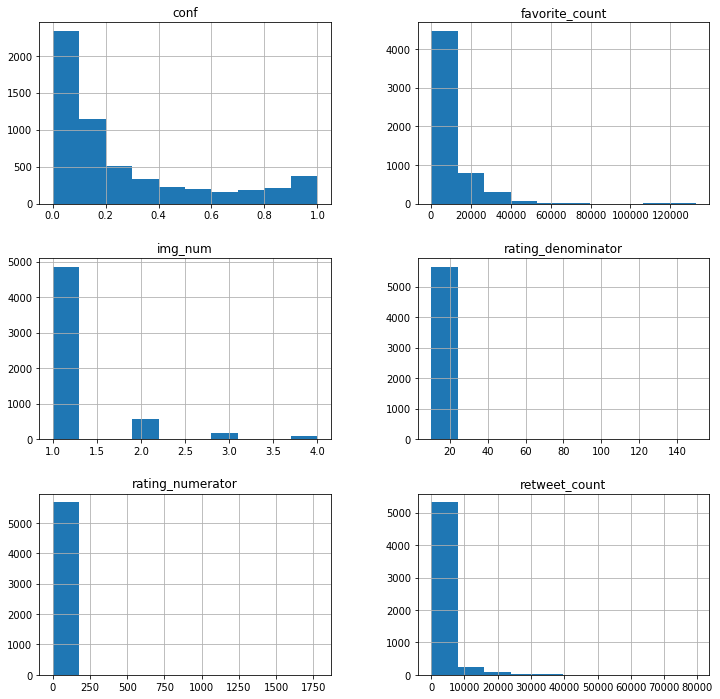

In [87]:
# Visualize the numeric columns using histograms
numeric_columns = df_combined[['retweet_count', 'favorite_count', 'rating_numerator','rating_denominator', 'img_num', 'conf']]
numeric_columns.hist(figsize = (12,12));

### Visualization

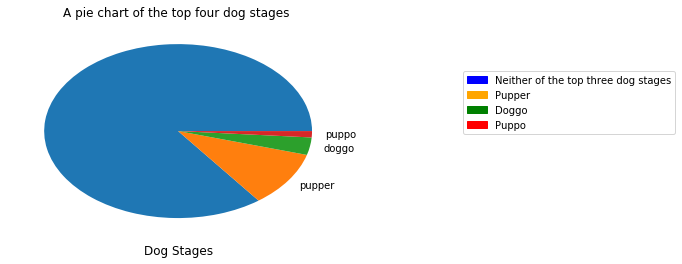

In [99]:
# A pie chart of the  top four  dog stages
pie_stages=df_combined.dog_stages.value_counts()[:4] 
pie_stages.plot(kind='pie',title='A pie chart of the top four dog stages ')
plt.xlabel('Dog Stages',fontsize=12)
plt.ylabel('',fontsize=12)
blue_patch = mpatches.Patch(color='blue', label='Neither of the top three dog stages')
orange_patch = mpatches.Patch(color='orange', label='Pupper')
green_patch = mpatches.Patch(color='green', label='Doggo ')
red_patch = mpatches.Patch(color='red', label='Puppo ')
plt.legend(handles=[blue_patch,orange_patch,green_patch,red_patch],bbox_to_anchor=(2.0, 0.8));


### Insights:
1. All numeric variables are skewedto the right, meaning the least values have occurred the most.
2. We have conf. = 100%, it must be clear picture for a specific breed of dog.
3. The lowest dog rating_numerator is *0* rating and the highest is *1776*
4. *Pupper* has the highest count followed by *doggo* and *puppo* comes third

#### References
* Kaggle https://www.kaggle.com/code/rihamrafat/we-rate-dogs-data-wrangling
* Stackoverflow https://stackoverflow.com/questions/43288550/iopub-data-rate-exceeded-in-jupyter-notebook-when-viewing-image
* Pythontutorial https://www.pythontutorial.net/python-basics/python-read-text-file/#:~:text=To%20read%20a%20text%20file%20in%20Python%2C%20you%20follow%20these,the%20file%20close()%20method.
* Sparkbyexample https://sparkbyexamples.com/pandas/pandas-replace-values-based-on-condition/#:~:text=You%20can%20replace%20values%20of,loc%5B%20%5D%20property.